<h1><center>Laboratorio 6: El Pandas no Muerde (act III) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudantes: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Jose Ignacio Saffie
- Nombre de alumno 2: Matias Lopez Roman


### **Link de repositorio de GitHub:** `https://github.com/JoseSaffie/MDS7202-1-Primavera-2023.git`


## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
#!pip install --upgrade pandas
#!pip install xlrd
#!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
#!pip install --upgrade plotly
#!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

[ ] Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

El dataset esta conformado por 8 columnas, tales como: Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID y Country. Adicionalmente, los tipos de datos para cada columna son: category, category, object, int64, datetime64[ns],float64, category y object. Estas variables representan lo siguiente: 

- Invoice: Identificador de la compra.
- StockCode: es el codigo del producto.
- Descrption: es la descripcion del producto, hace referencia a que es.
- Quantity: cantidad comprada por el cliente de ese producto en esa transaccion.
- InvoiceDate: Fecha de la compra.
- Price: precio de la compra.
- Customer ID: el identificador del cliente.
- Country: pais de la compra.

In [3]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  category      
 1   StockCode    525461 non-null  category      
 2   Description  525461 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  category      
 7   Country      525461 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 24.6+ MB


In [5]:
df_retail.describe()

,Quantity,Price
count,525461.000000,525461.000000
mean,10.337667,4.688834
std,107.424110,146.126914
min,-9600.000000,-53594.360000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.210000
max,19152.000000,25111.090000


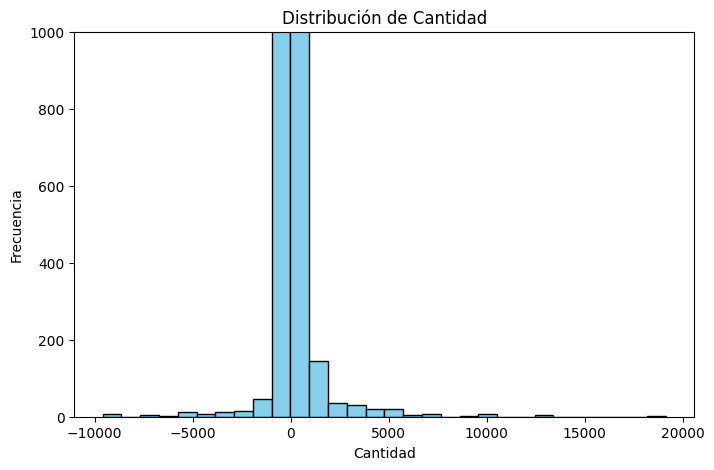

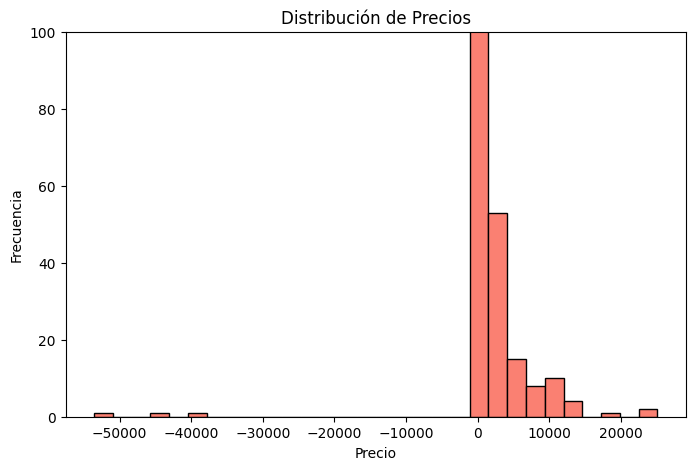

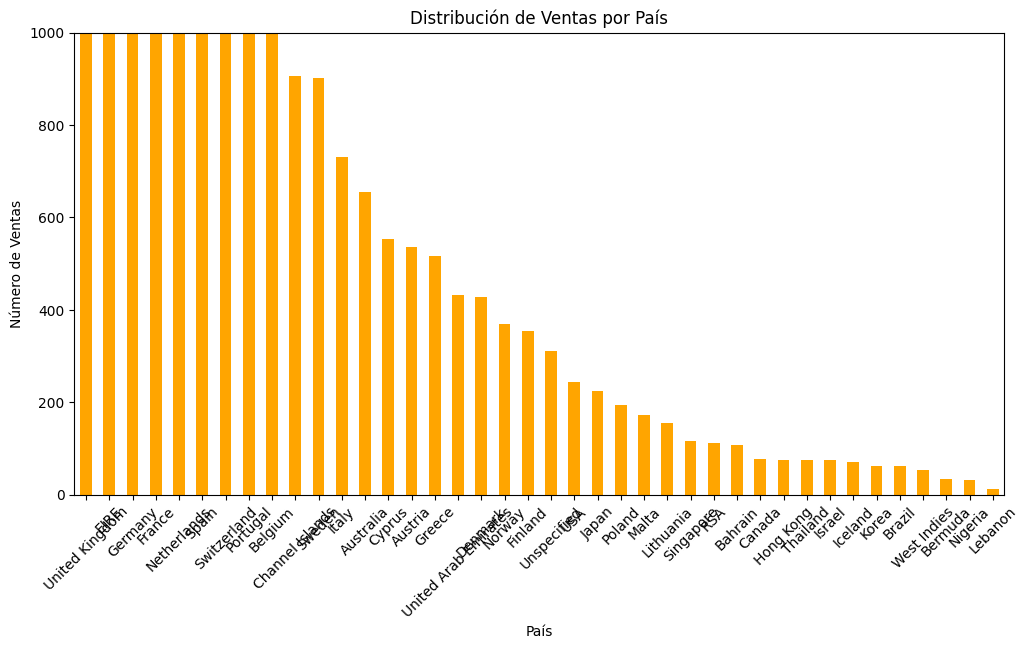

In [6]:
# Histograma para Quantity
plt.figure(figsize=(8, 5))
plt.hist(df_retail['Quantity'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.ylim(0, 1000)
plt.title('Distribución de Cantidad')
plt.show()


# Histograma para Price
plt.figure(figsize=(8, 5))
plt.hist(df_retail['Price'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.ylim(0, 100)
plt.title('Distribución de Precios')
plt.show()

# Gráfico de barras para Country
plt.figure(figsize=(12, 6))
df_retail['Country'].value_counts().plot(kind='bar', color='orange')
plt.xlabel('País')
plt.ylabel('Número de Ventas')
plt.ylim(0, 1000)
plt.title('Distribución de Ventas por País')
plt.xticks(rotation=45)
plt.show()

## 1.2 Análisis Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

El analisis univariable hace referencia a estudiar, analizar y describir el comportamiento de una variable o de las variables del dataset de forma individual, es decir, vemos sus patrones y estadisticas para cada una por separadas. Por otra parte, en un analisis multivariable se buscan patrones y relaciones entre 2 o mas variables de nuestro conjunto de datos, esto para ver si existen dependencias entre las variables y como podemos obtener conclusiones mas complejas de los datos. Finalmente, el analisis de datos faltantes es necesario para visualizar la calidad de los datos con los que estamos tabajando y de ser necesario hacer correciones al dataset, asi nuestras conclusiones seran en base a datos correctos y completos.

> Respuesta Aquí

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [12]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe()])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns = {'count': 'Count'})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [8]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203820 bytes
dtype: object

    Análisis de la primera serie: Lo primero que observamos en base a los precios es que en general la mayoría de items tienen valores iguales o menor a 2.1 , se ve también que hay pocos precios únicos dado a la alta repetición en precios que muestran los datos, hay algunos valores negativos que no hacen sentido a los precios ya que no se puede vender por un valor negativo.  Viendo los gráficos los primero que notamos es que considerando los outliers es muy complicado revisar patrones o el comportamiento de los datos, es mas el gráfico de caja no se alcanza a ver nada considerando los outliers. Una vez que quitamos los outliers podemos ver mejor como se comportan los precios y vemos que la mayoría esta bajo 5 y que la tendencia esta en que el precio de las cosas sea bajo, pareciera ser algún tipo de distribución exponencial, igualmente podemos ver que hay algunos items en especial que tienen valores muchos mas alto que lo común.

In [16]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203820 bytes
dtype: object

Análisis de la segunda serie:, nuevamente podemos notar que existen algunos datos raros dentro de los datos, para los datos de cantidad vemos que hay datos negativos sobre cantidad lo que no hace nada de sentido, también vemos la las cantidad de items a llevar no es exclusivamente especial. Viendo el gráfico vemos que nuevamente con los outliers es super difícil hacer un pronostico o encontrar patrones de como se están moviendo los datos ahora bien con los outliers fuera podemos ver algunas diferencias con la serie anterior y es que los rangos intercuartiles son mucho más amplios que en los otros datos, probablemente el hecho de que la cantidad tiene que ser un numero entero ayuda a que la distribución de los datos no sea tan desordenada. Algunos datos que podemos observar es que la moda esta en llevar solo un objeto, luego en llevar 2 o 3, y asi va disminuyendo, existen algunos casos raros donde a pesar que se lleven muchos mas items y uno esperaría que disminuyera la gente existen los caos de 24 o 25 items que tiene un conteo muy alto para donde esta, al igual que 96 o 97, deben ser algunos clientes especiales.


In [17]:
profile_serie(df_retail['InvoiceDate'])

C:\Users\GE62VR 6RF\AppData\Local\Temp\ipykernel_4900\2460238009.py:10: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



## InvoiceDate Profile

Type                           datetime64[ns]
Number of observations                 525461
Unique                                  25296
Top                       2010-12-06 16:57:00
Freq                                      675
first                     2009-12-01 07:45:00
last                      2010-12-09 20:01:00
                                             
Missing cells                               0
Missing cells (%)                       0.0 %
Duplicate rows                         520400
Duplicate rows (%)                    99.04 %
Total size in memory            4203820 bytes
dtype: object

    Análisis de la tercera serie: Para este caso nos interesa analizar cuales son las tendencias de compra o donde se acumulan más la ventas, es por eso que lo primero a darnos cuenta es que un boxplot no aporta mucho en el análisis, ahora bien viendo la acumulación de ventas partiendo por el principio vemos que la tienda no logro aprovechar al máximo la primera temporada navideña que vivió, incluso durante el 20 de diciembre y 2 de enero tuvo la menor cantidad de flujo de clientes en su historia, luego durante el año se ve que esta entre 30 y 40 clientes cada dos semanas, pero cuando llego a septiembre se ve un aumento en el flujo de clientes considerable llegando a las segunda y tercera semana de noviembre como el máximo flujo de clientes en la historia de la tienda, pareciera que ahora diciembre va a ser mucho mejor pero los datos se corta en diciembre y no se pueda dar un veredicto.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes. Ejecute la función `profile_df` y comente sus resultados.

In [13]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

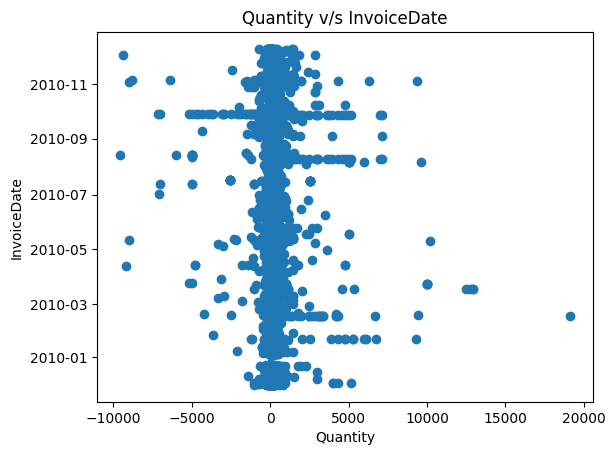

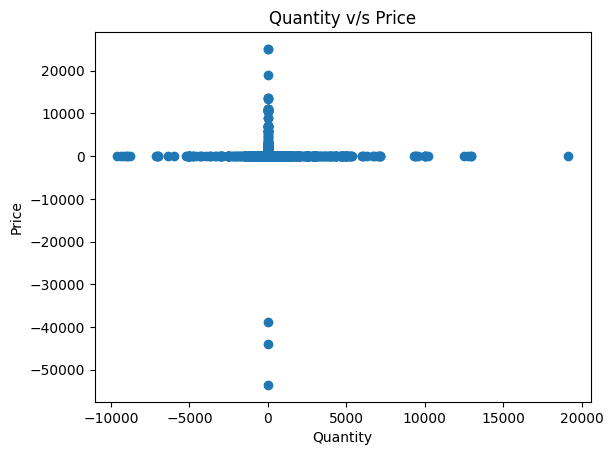

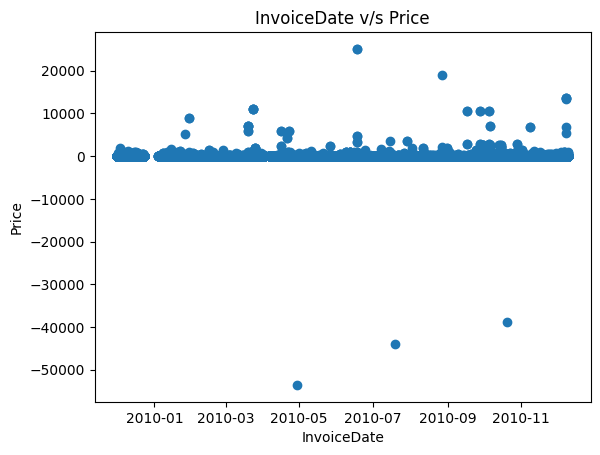

## Correlation:

C:\Users\GE62VR 6RF\AppData\Local\Temp\ipykernel_4900\2390459975.py:21: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Missing Matrix:

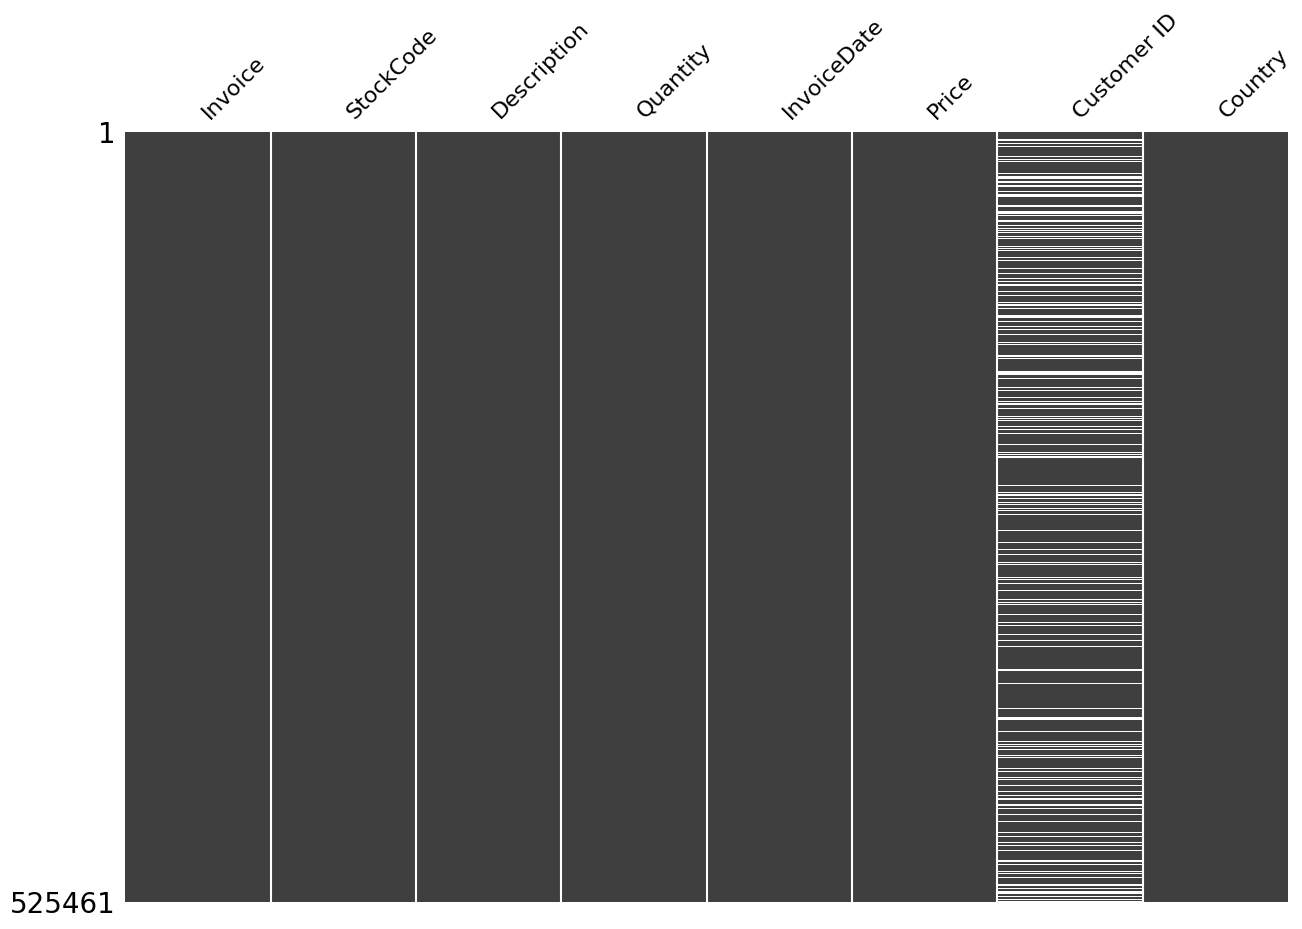

In [14]:
profile_df(df_retail)

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que genere una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [31]:
#Código Aquí

def limpieza(dataframe):
    # Crear una copia del dataframe para evitar modificar el original
    dataframe_copia = dataframe.copy()
    # Eliminar filas con valores negativos en las columnas Price y Quantity
    dataframe_copia = dataframe_copia[(dataframe_copia['Price'] > 0) & (dataframe_copia['Quantity'] > 0)]
    return dataframe_copia

In [32]:
df_retail2 = limpieza(df_retail)

In [34]:
profile_serie(df_retail2['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         511566.0
Mean                           11.40015
Std                           86.761177
Min                                 1.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                       11849.646687
Skew                           88.67179
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   511425
Duplicate rows (%)              99.97 %
Total size in memory      8185056 bytes
dtype: object

In [35]:
profile_serie(df_retail2['Price'])

## Price Profile

Type                            float64
Number of observations         511566.0
Mean                           4.252563
Std                           63.664629
Min                               0.001
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                       61551.915238
Skew                           210.3689
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   510710
Duplicate rows (%)              99.83 %
Total size in memory      8185056 bytes
dtype: object

In [36]:
profile_serie(df_retail2['InvoiceDate'])

C:\Users\GE62VR 6RF\AppData\Local\Temp\ipykernel_4900\2460238009.py:10: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



## InvoiceDate Profile

Type                           datetime64[ns]
Number of observations                 511566
Unique                                  19468
Top                       2010-12-06 16:57:00
Freq                                      675
first                     2009-12-01 07:45:00
last                      2010-12-09 20:01:00
                                             
Missing cells                               0
Missing cells (%)                       0.0 %
Duplicate rows                         509777
Duplicate rows (%)                    99.65 %
Total size in memory            8185056 bytes
dtype: object

## Bivariant Analysis:

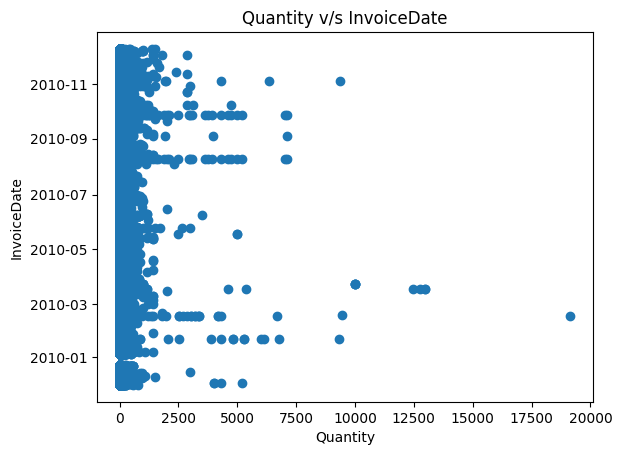

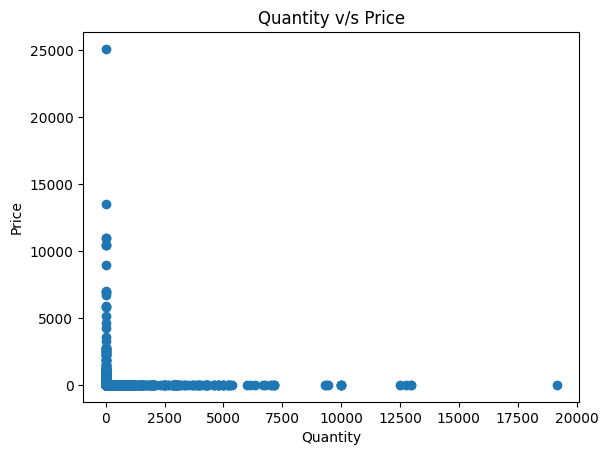

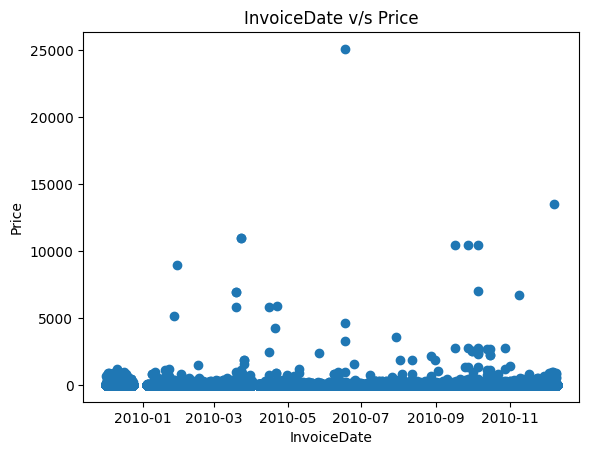

## Correlation:

C:\Users\GE62VR 6RF\AppData\Local\Temp\ipykernel_4900\2390459975.py:21: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Missing Matrix:

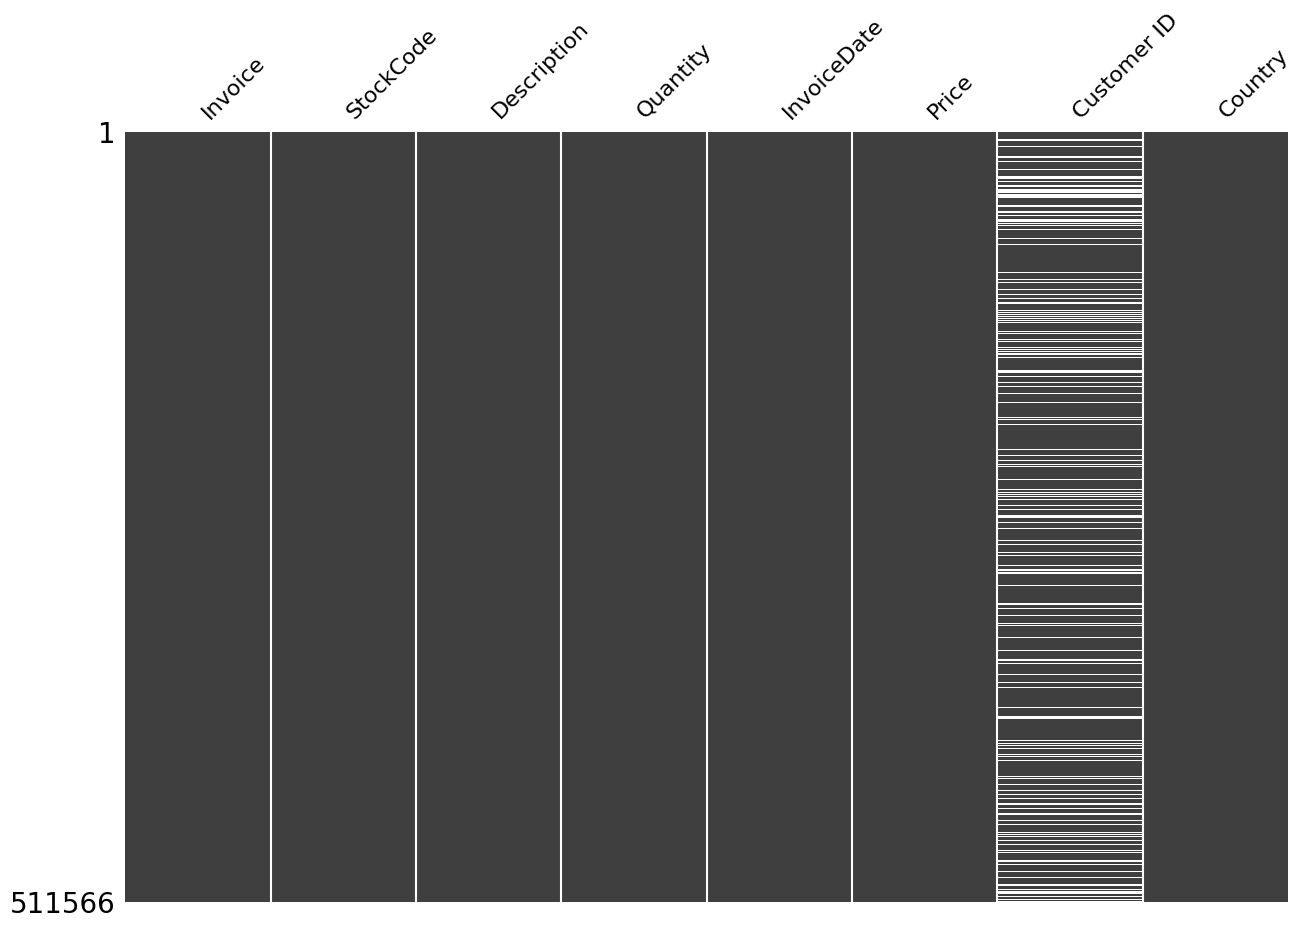

In [33]:
profile_df(df_retail2)

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [49]:
#> Código Aquí

import pandas as pd
import plotly.express as px

# Asumiendo que tienes un dataframe llamado 'dataframe' con columnas "Product", "Price" y "Quantity"

# Calcular las ganancias para cada producto (Price * Quantity)
df_retail2['Ganancias'] = df_retail2['Price'] * df_retail2['Quantity']

# Agrupar por producto y calcular las ganancias totales para cada producto
ganancias_por_producto = df_retail2.groupby('StockCode')['Ganancias'].sum().reset_index()

# Obtener los 30 productos que generan más ganancias
top_30_productos_ganancias = ganancias_por_producto.nlargest(30, 'Ganancias')

top_30_productos_ganancias['StockCode'] = top_30_productos_ganancias['StockCode'].astype(str)

# Crear un gráfico de barras utilizando plotly
fig = px.bar(top_30_productos_ganancias, x='StockCode', y='Ganancias', 
             labels={'Ganancias': 'Ganancias', 'StockCode': 'Producto'},
             title='Top 30 Productos que Generan Más Ganancias',
             color='Ganancias')

# Establecer el orden de las categorías en el eje x
fig.update_xaxes(categoryorder='total descending')

# Mostrar el gráfico
fig.show()


In [52]:
# Asumiendo que tienes un dataframe llamado 'dataframe' con columnas "Product", "Price" y "Quantity"

# Calcular las ganancias para cada producto (Price * Quantity)
df_retail2['Ganancias'] = df_retail2['Price'] * df_retail2['Quantity']

# Agrupar por producto y calcular las ganancias totales para cada producto
ganancias_por_producto = df_retail2.groupby('Description')['Ganancias'].sum().reset_index()

# Obtener los 30 productos que generan más ganancias
top_30_productos_ganancias = ganancias_por_producto.nlargest(30, 'Ganancias')

top_30_productos_ganancias['Description'] = top_30_productos_ganancias['Description'].astype(str)

# Crear un gráfico de barras utilizando plotly
fig = px.bar(top_30_productos_ganancias, x='Description', y='Ganancias', 
             labels={'Ganancias': 'Ganancias', 'Description': 'Producto'},
             title='Top 30 Productos que Generan Más Ganancias',
             color='Ganancias')

# Establecer el orden de las categorías en el eje x
fig.update_xaxes(categoryorder='total descending')

# Ajustar el ángulo de las etiquetas del eje x y el tamaño de la fuente
fig.update_xaxes(tickangle=45, tickfont=dict(size=8))

# Mostrar el gráfico
fig.show()

In [57]:
    # Agrupar por artículo y calcular la cantidad total vendida para cada artículo
    articulos_mas_vendidos = df_retail2.groupby('Description')['Quantity'].sum().reset_index()
    
    # Obtener los 30 artículos más vendidos
    top_30_articulos = articulos_mas_vendidos.nlargest(30, 'Quantity')
    
    # Crear un gráfico de barras para los artículos más vendidos
    fig = px.bar(top_30_articulos, x='Description', y='Quantity',
                 labels={'Quantity': 'Cantidad Vendida', 'Description': 'Artículo'},
                 title='Top 30 Artículos Más Vendidos por Cantidad')
    
    # Mostrar el gráfico
    fig.show()

A partir de estos graficos, se observa que para el top 3 productos, solo hay una coincidencia entre los productos mas vendidos y los que generan mas ganancias (White hanging heart t-light holder). Despues vemos que en la posicion 5 para ambos graficos, coincide el producto assorted colour bird ornament. En general para los 30 productos, no existe suficiente evidencia que indique que los productos que mas generan ganancias, son los mas vendidos.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [55]:
def plot_ventas(dataframe):

    # Convertir la columna InvoiceDate a formato de fecha (si no está en ese formato ya)
    dataframe['InvoiceDate'] = pd.to_datetime(dataframe['InvoiceDate'])
    
    # Extraer año-mes-día de la columna InvoiceDate y crear una nueva columna llamada 'Fecha'
    dataframe['Fecha'] = dataframe['InvoiceDate'].dt.strftime('%Y-%m-%d')
    
    # Calcular las ventas diarias
    ventas_diarias = dataframe.groupby('Fecha')['Quantity'].sum().reset_index()

    # Crear un gráfico de líneas utilizando plotly
    fig = px.line(ventas_diarias, x='Fecha', y='Quantity',
                  labels={'Quantity': 'Ventas', 'Fecha': 'Fecha'},
                  title='Ventas Diarias',
                  markers=True)

    # Mostrar el gráfico
    fig.show()

In [56]:
plot_ventas(df_retail2)

A partir del grafico se observa que existen fechas especificas donde las ventas diarias tienen un aumento significativo respecto al resto de dias del año que pueden estar ligadas a eventos comerciales a nivel global, de mercados especificos o eventos de la tienda en si como ofertas.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>